# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,r2_score

# Importing Dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
file_path ="Sales.csv"
df=pd.read_csv(file_path)
print("data from uploaded file:")
print(df.head(100))

# Visualizing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [2]:
sns.set_style("darkgrid")
sns.pairplot(df)

NameError: name 'sns' is not defined

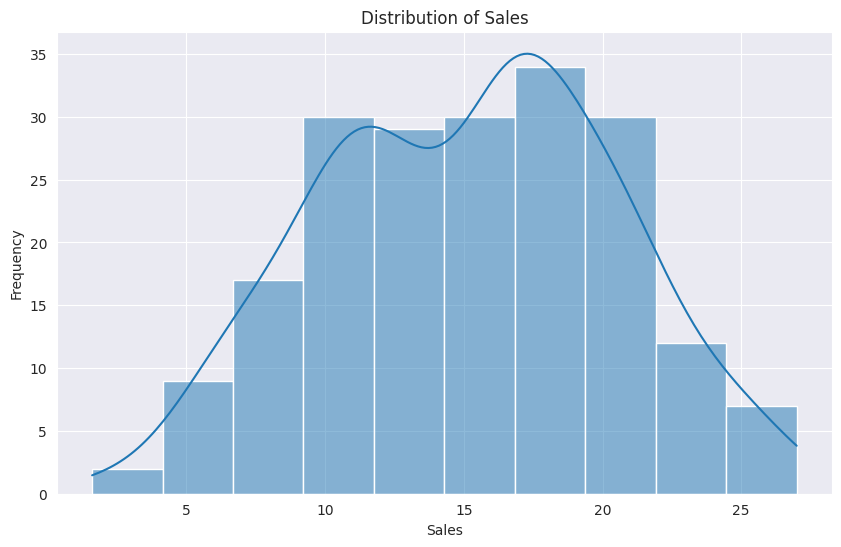

In [ ]:
# Plotting the distribution of the target variable 'Sales'
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

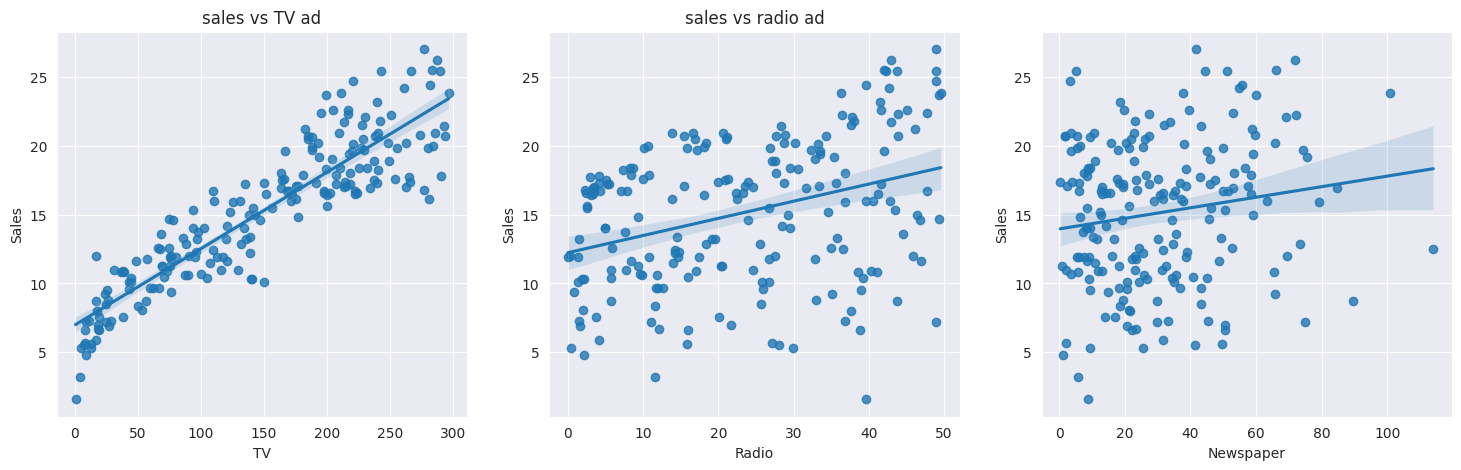

In [ ]:
#Plotting scatter plots with Regression Lines
fig,axs=plt.subplots(1,3,figsize=(18,5))
sns.regplot(x='TV',y='Sales',data=df,ax=axs[0])
axs[0].set_title("sales vs TV ad")
sns.regplot(x='Radio',y='Sales',data=df,ax=axs[1])
axs[1].set_title("sales vs radio ad")
sns.regplot(x='Newspaper',y='Sales',data=df,ax=axs[2])
axs[2]=aet_title=("Sales vs newspaper ad")
plt.show()

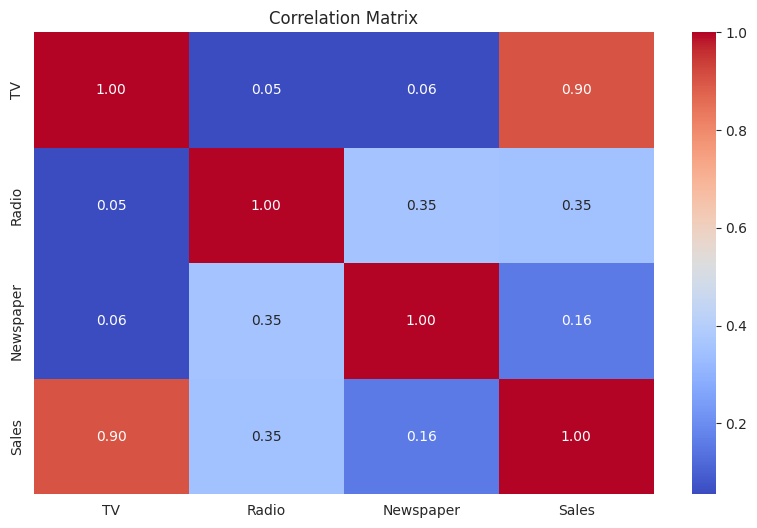

In [ ]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# Splitting Train and Test data

In [ ]:
x=df.drop('Sales',axis=1)
y=df['Sales']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
x


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


# Model Training and Evaluation

In [ ]:
# Model Training
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Model Testing
y_pred=model.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error",mse)
print("R2 Score",r2)

Mean Squared Error 2.541624036229147
R2 Score 0.9091484341849799


# Visualizing the predictions

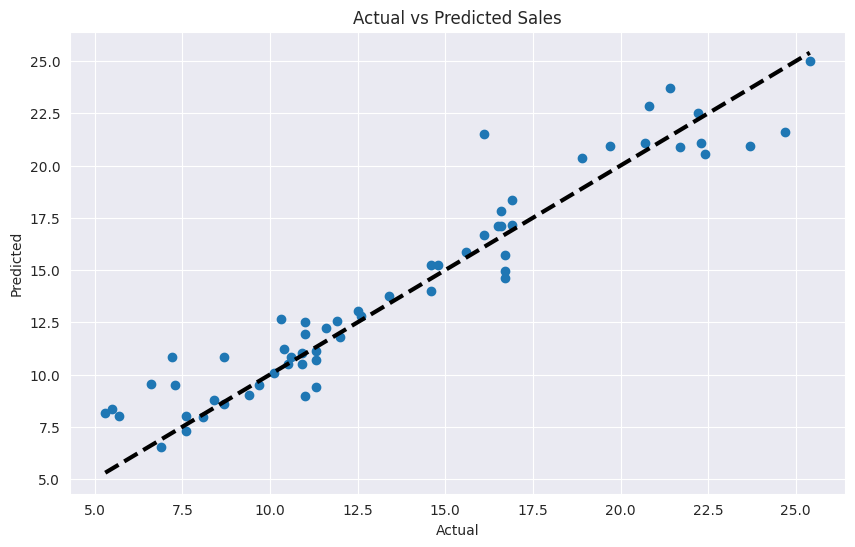

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sales')
plt.show()